# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int32         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 7.0+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

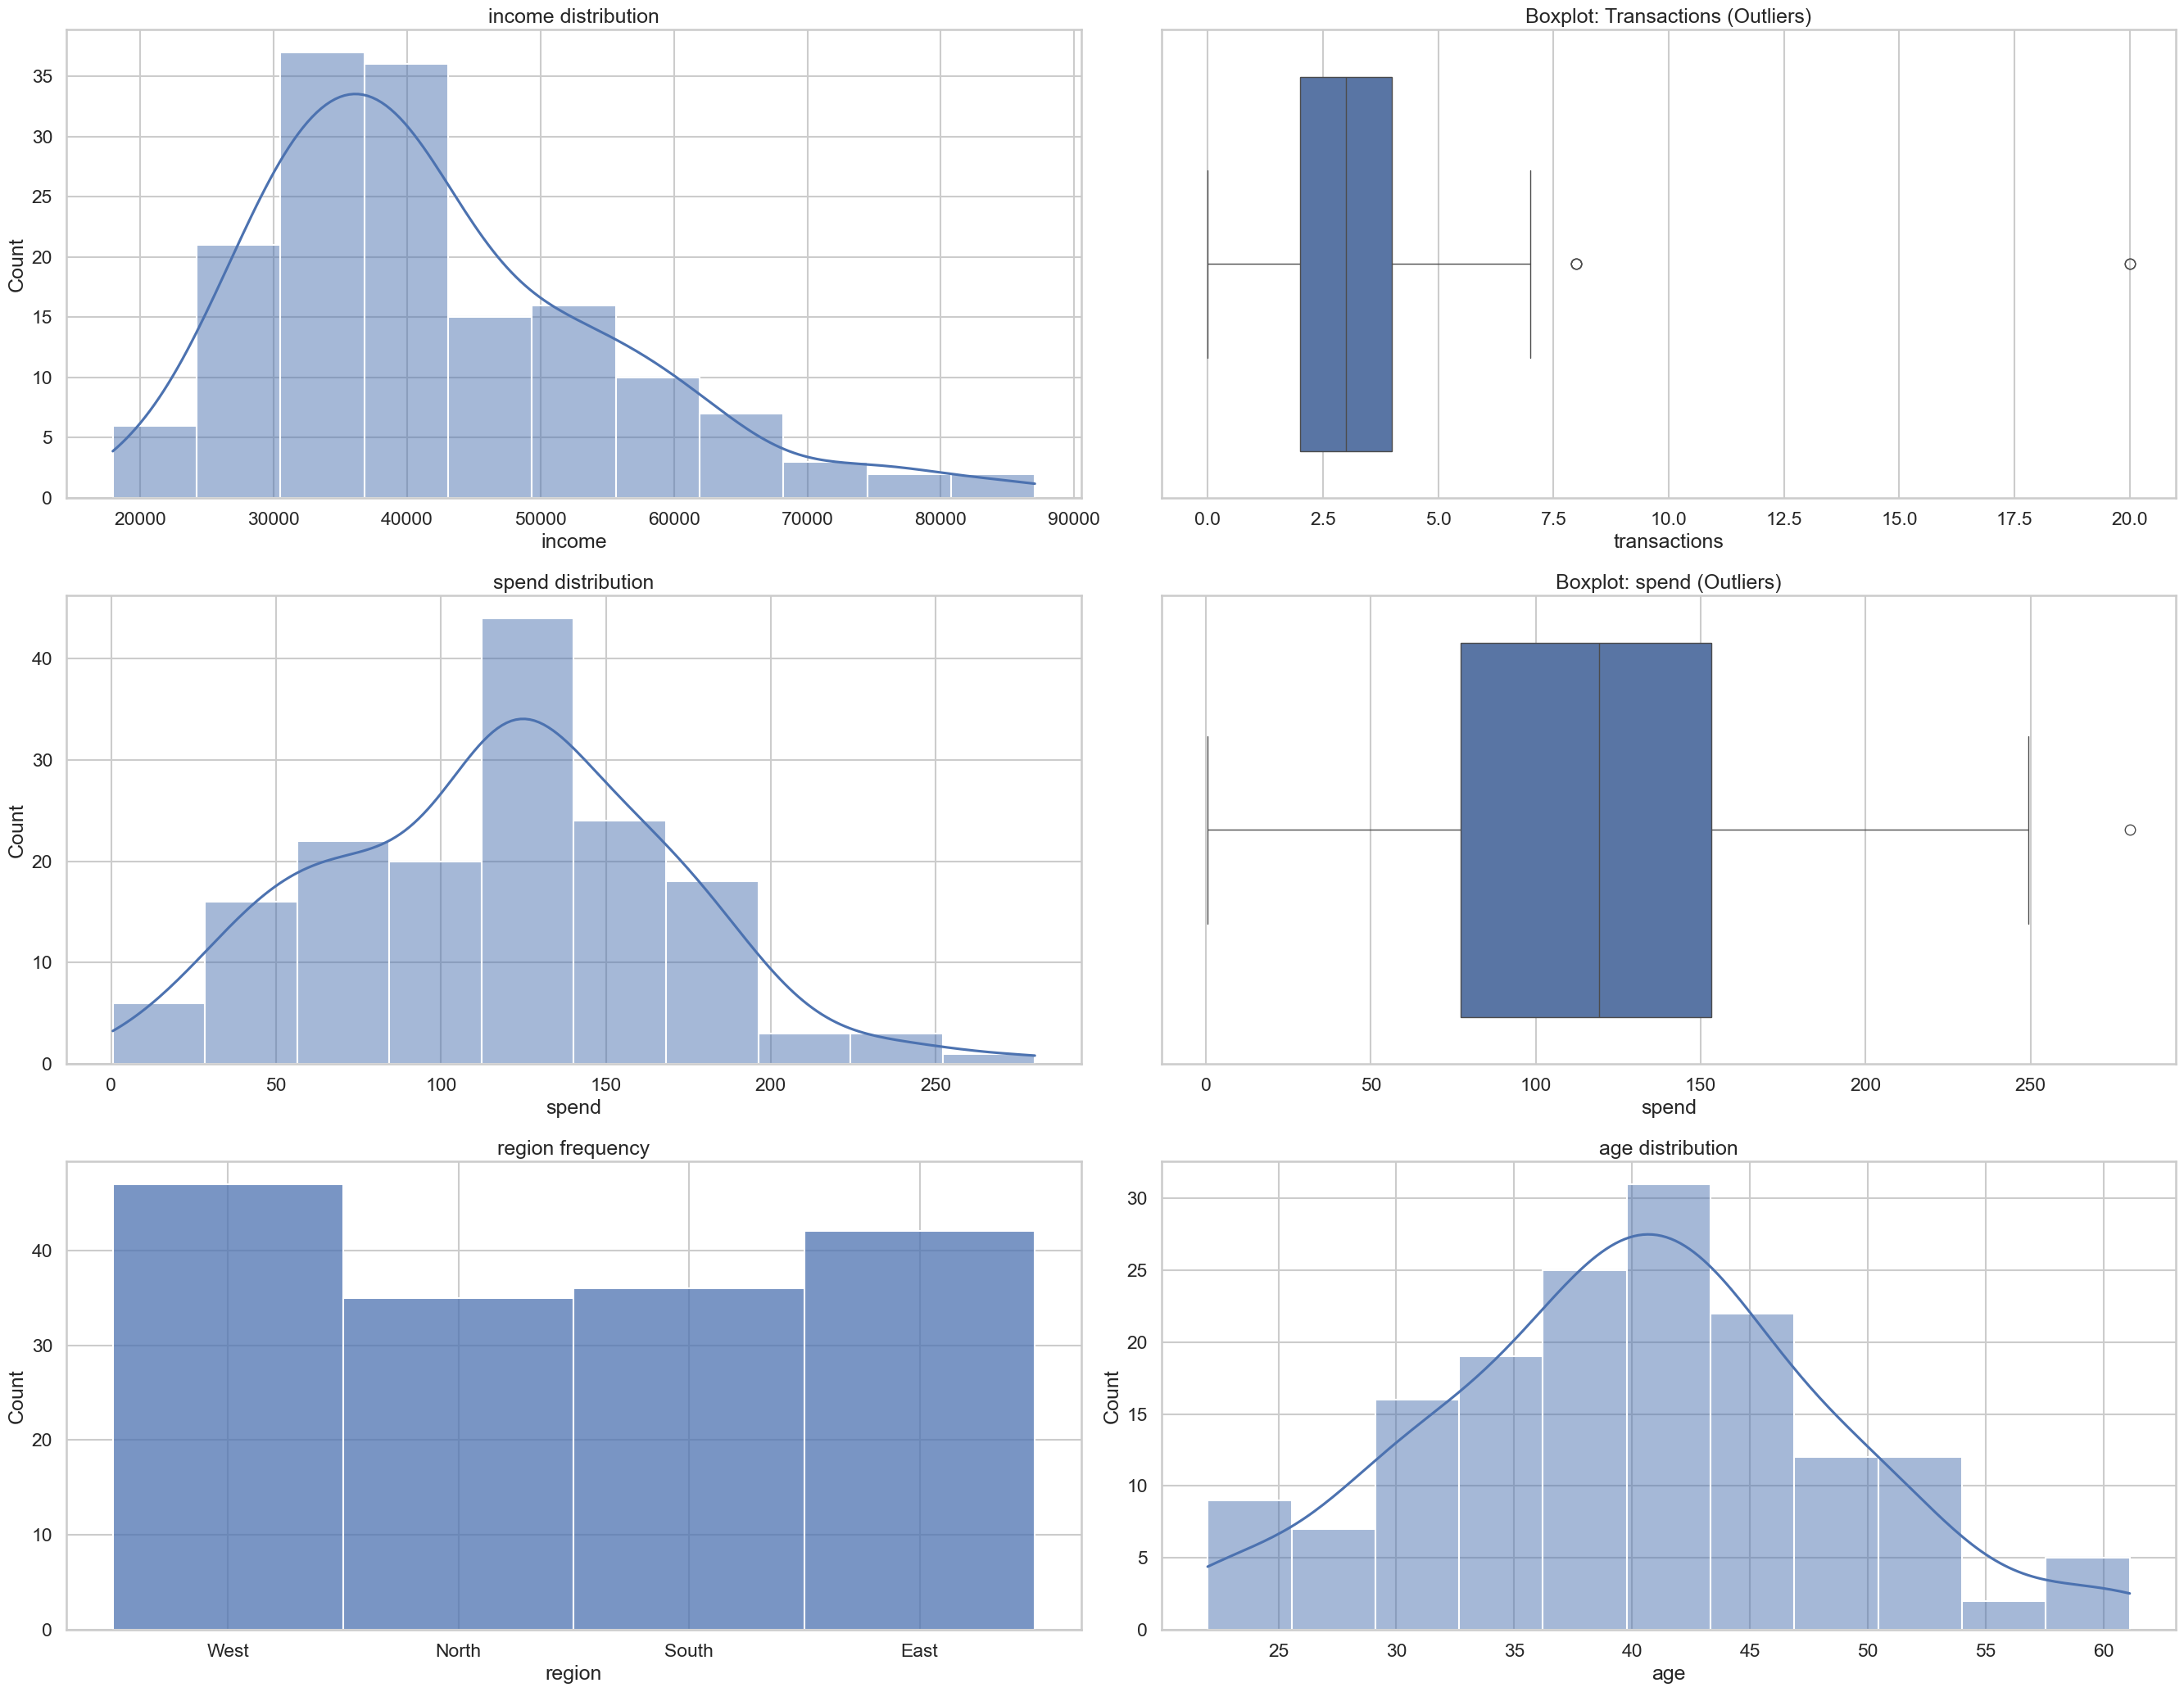

In [4]:
figure, axis = plt.subplots(3, 2, figsize=(27,21))

sns.histplot(df['income'], kde=True, ax=axis[0,0])
axis[0, 0].set_title('income distribution')

sns.boxplot(x=df['transactions'], ax=axis[0,1])
axis[0, 1].set_title(f'Boxplot: {"Transactions (Outliers)"}')

sns.histplot(df['spend'], kde=True, ax=axis[1,0])
axis[1, 0].set_title('spend distribution')

sns.histplot(df['region'], ax=axis[2,0])
axis[2, 0].set_title('region frequency')

sns.boxplot(x=df['spend'], ax=axis[1,1])
axis[1, 1].set_title(f'Boxplot: {"spend (Outliers)"}')

sns.histplot(df['age'], kde=True, ax=axis[2,1])
axis[2, 1].set_title('age distribution')

plt.tight_layout()

# TODO: histogram + KDE for a key variable
# sns.histplot(df['income'], kde=True)
# plt.title('Income Distribution')
# plt.show()

# # TODO: boxplot for outliers
# sns.boxplot(x=df['transactions'])
# plt.title('Transactions (Outliers)')
# plt.show()

## 4) Relationships (TODO: add at least 2)

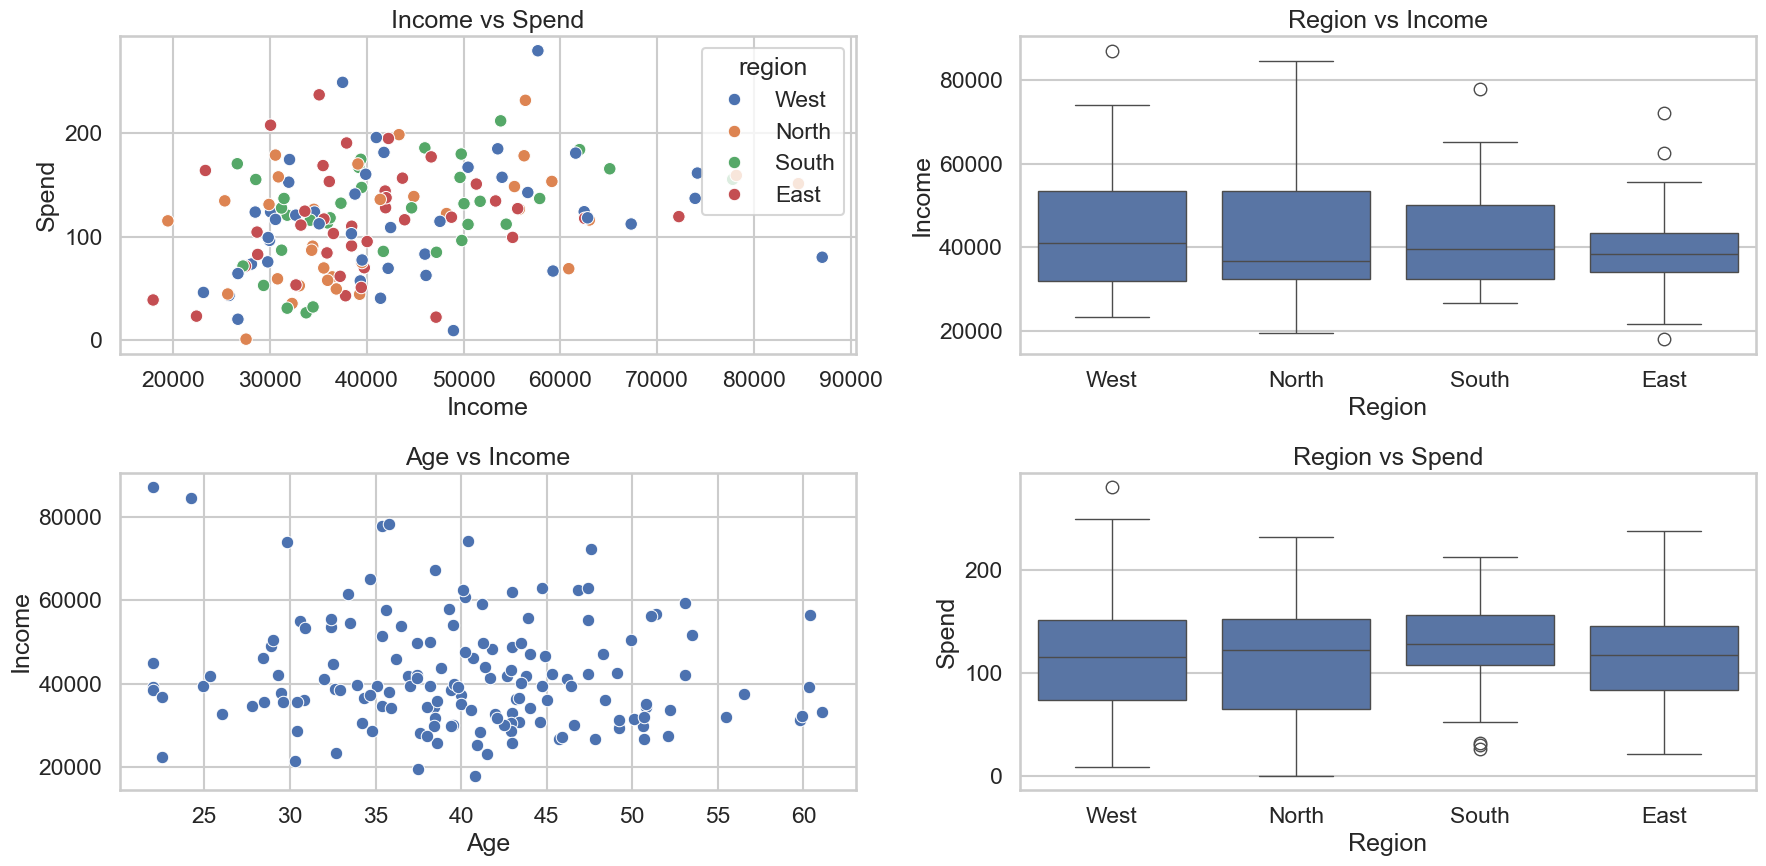

In [5]:
figure, axes = plt.subplots(2, 2, figsize=(18,9))

sns.scatterplot(data=df, x='income', y='spend', hue='region', ax=axes[0,0])
axes[0,0].set_title('Income vs Spend')
axes[0,0].set_xlabel('Income')
axes[0,0].set_ylabel('Spend')

sns.scatterplot(data=df, x='age', y='income', ax=axes[1,0])
axes[1,0].set_title('Age vs Income')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Income')

sns.boxplot(data=df, x='region', y='income', ax=axes[0,1])
axes[0,1].set_title('Region vs Income')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Income')

sns.boxplot(data=df, x='region', y='spend', ax=axes[1,1])
axes[1,1].set_title('Region vs Spend')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Spend')

# sns.pairplot(df[["income","spend","transactions","age","region"]], hue="region", corner=True, diag_kind="hist")

plt.tight_layout()
plt.show()

## 5) (Optional) Correlation matrix

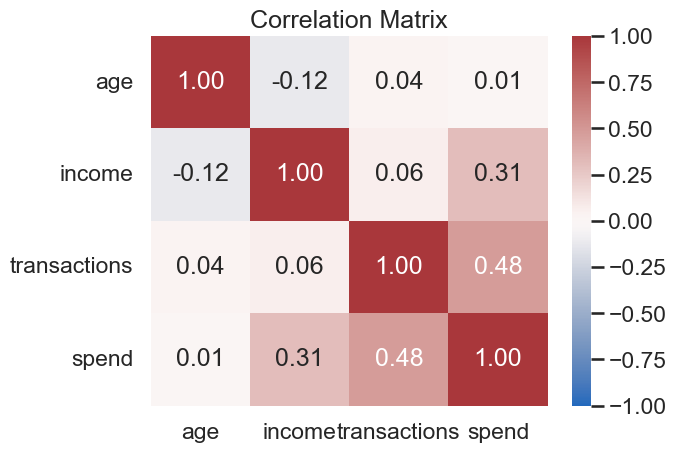

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [6]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
#### Top 3 insights
- Most customers have 2–4 transactions, but there are extreme outliers with high skew and kurtosis.
- Income and transactions are weakly correlated, implying that higher income does not come with more transactions.
- West shows slightly higher median income/spend; East seems lower. This suggests `region` may be a categorical predictor.
#### Assumptions & risks
- Outliers may represent high-value customers, and dropping them may result in the loss of business insight and potential.
- Correlation assumes linearity, but there could be non-linear patterns.
#### Next steps before modeling (cleaning & features)
- cleaning
  - handle the missing values in `spend` and `income`
  - winsorize or log-transform skewed distributions (e.g., `income` and `transactions`)
- features
  - consider using spend per transaction (so that we can get purchase size)
  - consider grouping ages (e.g. 20s, 30s, 40s, etc.)
  - flag high transactions or high spend customers as a separate feature, as they may present different customer types